In [20]:
%matplotlib inline

In [21]:
import itertools

In [22]:
import matplotlib; matplotlib.__version__

'3.5.1'

In [23]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patheffects as PathEffects

import numpy as np


In [24]:
N = 5
data = np.tile(np.arange(N),(N,1))

In [25]:
data.shape

(5, 5)

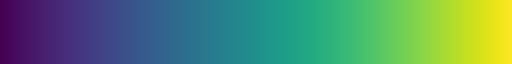

In [26]:
cmap = plt.get_cmap('viridis')
cmap

In [27]:
scaled = 2 
norm = mcolors.BoundaryNorm(np.arange(N*scaled-1), cmap.N)

In [28]:
norm.boundaries

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

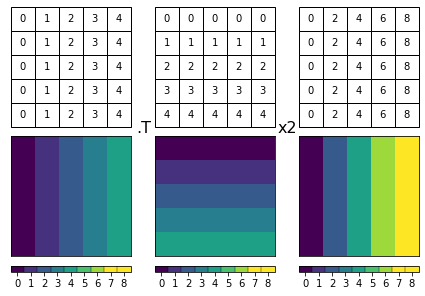

In [29]:
fig, axd = plt.subplot_mosaic([['ti', 'tr', 'ts'], ['mi', 'mr', 'ms']], constrained_layout=True )
def make_set(ax_t, ax_m, data):
    axd[ax_t].table(data, cellLoc='center', bbox= [0,0, 1,1])
    axd[ax_t].set_aspect("equal")
    axd[ax_t].axis('off')
    mi = axd[ax_m].matshow(data, cmap=cmap, norm=norm)
    axd[ax_m].set(xticks=[], yticks=[])
    cb = fig.colorbar(mi, ax=axd[ax_m], values = np.arange(N*scaled-1), 
                      orientation='horizontal', drawedges=True, fraction=.05)
    
make_set('ti', 'mi', data)
make_set('tr', 'mr', data.T)
make_set('ts', 'ms', data*scaled)
    
fig.text(1.05, -.05, '.T', fontsize=16, transform=axd['ti'].transData)
fig.text(1.025, -.05, 'x2', fontsize=16, transform=axd['tr'].transData)
fig.savefig('../figures/equivariance.png')

In [44]:
def make_set(ax_t, data, alpha=.25, color_cells=False):
    tab = axd[ax_t].table(data, cellLoc='center', bbox= [0,0, 1,1])
    for (r,c) in itertools.product(range(N), range(N)):
        if color_cells:
            tab[(r,c)].set_color(cmap(norm(data[r,c])))
        tab[(r,c)].set_alpha(alpha)
        tab[(r,c)].set_edgecolor('black')
        text = tab[(r,c)].get_text()
        text.set(fontsize=14, ha='center', va='center')
    axd[ax_t].set_aspect("equal")
    axd[ax_t].axis('off')

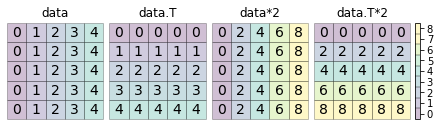

In [45]:
fig, axd = plt.subplot_mosaic([['ti','tr', 'ts', 'trs']], constrained_layout=True )
make_set('ti', data, color_cells=True)
make_set('tr', data.T, color_cells=True)
make_set('ts', data*scaled, color_cells=True)
make_set('trs',data.T*scaled, color_cells=True)

axd['ti'].set_title('data')
axd['tr'].set_title('data.T')
axd['ts'].set_title(f'data*{scaled}')
axd['trs'].set_title(f'data.T*{scaled}')
fig.colorbar(None, ax=axd['trs'], cmap=cmap, norm=norm, alpha=alpha, 
             values = np.arange(N*scaled-1), drawedges=True, fraction=.05,)

fig.savefig(f'../figures/equivariance.png')

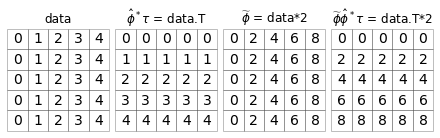

In [46]:
fig, axd = plt.subplot_mosaic([['ti','tr', 'ts', 'trs']], constrained_layout=True )
make_set('ti', data,)
make_set('tr', data.T)
make_set('ts', data*scaled)
make_set('trs', data.T*scaled)

axd['ti'].set_title('data')
axd['tr'].set_title(r'$\hat\phi^*\tau$ = data.T')
axd['ts'].set_title(r'$\widetilde\phi$ = ' + f'data*{scaled}')
axd['trs'].set_title(r'$\widetilde\phi\hat\phi^*\tau$ = ' + f'data.T*{scaled}') 

fig.savefig(f'../figures/phi.png')